# DSP-NSU Task 1

In [2]:
from collections.abc import Callable

import numpy as np
from scipy.integrate import quad

from helper import show_plots_helper as show

## Task 1

### Fourier series

In [3]:
def _make_fourier_series(func: Callable[[float], float], t: float, n: int, period: float, w: float) -> tuple[list, list]:
    a_n, b_n = [], []

    for i in range(n):
        def _sin(_x):
            return func(_x) * np.sin(i * w * _x)

        def _cos(_x: float):
            return func(_x) * np.cos(i * w * _x)

        a_n.append(2 / period * quad(_cos, t, period + t)[0])
        b_n.append(2 / period * quad(_sin, t, period + t)[0])

        if i == 0:
            a_n[0] /= 2

    return a_n, b_n


def make_fourier_approximation(func: Callable[[float], float], t: float, n: int, period: float, w: float) -> float:
    a_n, b_n = _make_fourier_series(func, t, n, period, w)

    for i in range(n):
        a_n[i] *= np.cos(t * w * i)
        b_n[i] *= np.sin(t * w * i)

    return np.sum(a_n) + np.sum(b_n)

### Square wave function

In [4]:
def rect_impulse(x: float) -> float:
    if x % (2 * np.pi) < np.pi:
        return 1
    else:
        return -1

### Getting approximation

/tmp/ipykernel_6118/2914153539.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a_n.append(2 / period * quad(_cos, t, period + t)[0])
/tmp/ipykernel_6118/2914153539.py:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  a_n.append(2 / period * quad(_cos, t, period + t)[0])


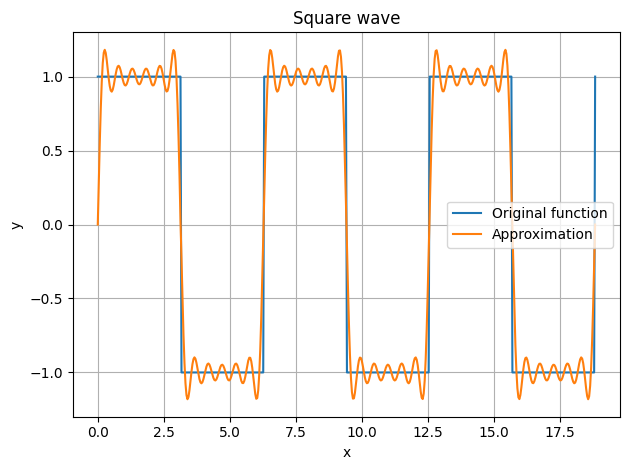

In [7]:
args = np.linspace(0, np.pi * 2 * 3, 500)
values = [rect_impulse(i) for i in args]
approximation = [make_fourier_approximation(rect_impulse, i, 12, np.pi * 2, 1) for i in args]

show([args, args], [values, approximation],
                  ['Original function', 'Approximation'], window_title='Square wave')

### Show gap between real wave and approximated one

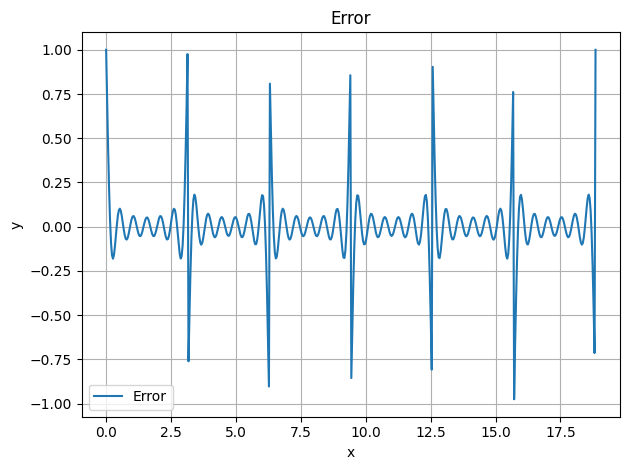

In [9]:
error = np.subtract(values, approximation)
show([args], [error], ['Error'], window_title='Error')

## Task 2

### Approximate cos

In [18]:
# Since a callable object is needed to calculate the integral, we will write a wrapper over np.cos to create a function with pre-set parameters
def callable_cos(x: np.array, amplitude: float=1, frequency: float=(1 / (2 * np.pi))) -> Callable[[np.array], float]:
    def _cos(_x: np.array):
        return amplitude * np.cos(_x * 2 * np.pi * frequency)
    return _cos

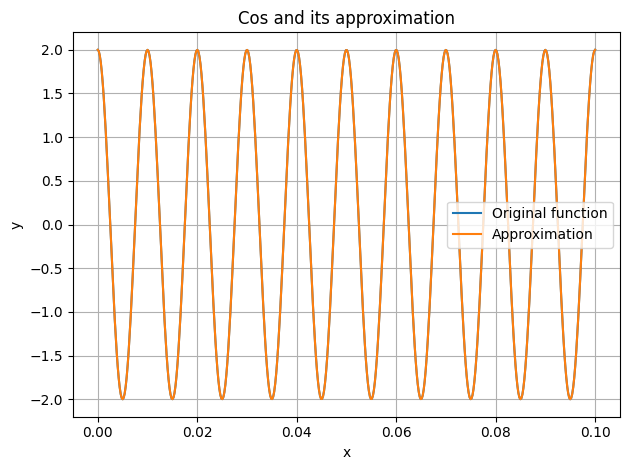

In [20]:
args = np.linspace(0, 0.1, 500)

# Getting callable function
amplitude = 2
frequency = 100
my_cos = callable_cos(args, amplitude, frequency)

cos_wave = my_cos(args)
approximation = [make_fourier_approximation(my_cos, i, 10, 1 / frequency, 2 * np.pi * frequency) for i in args]

show([args, args], [cos_wave, approximation],
                  ['Original function', 'Approximation'], window_title='Cos and its approximation')

### Let's see the spectrum

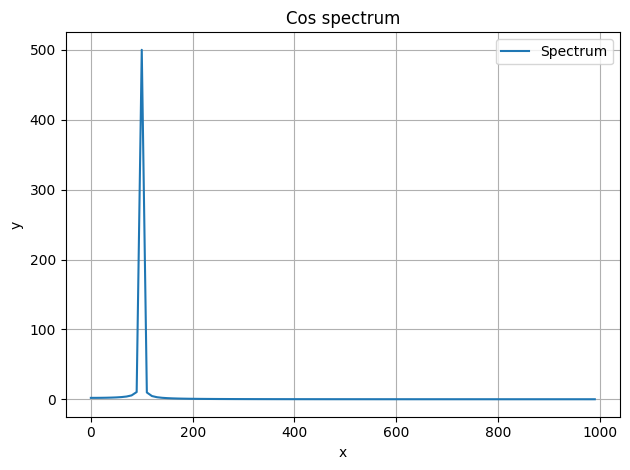

In [24]:
sp = np.fft.fft(cos_wave)
freq = np.fft.fftfreq(len(args), 0.1 / 500)
show([freq[0:100]], [np.abs(sp)[0:100]], ['Spectrum'], window_title='Cos spectrum')

### Getting spectrum of square wave function

/tmp/ipykernel_6118/2914153539.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a_n.append(2 / period * quad(_cos, t, period + t)[0])
/tmp/ipykernel_6118/2914153539.py:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  a_n.append(2 / period * quad(_cos, t, period + t)[0])


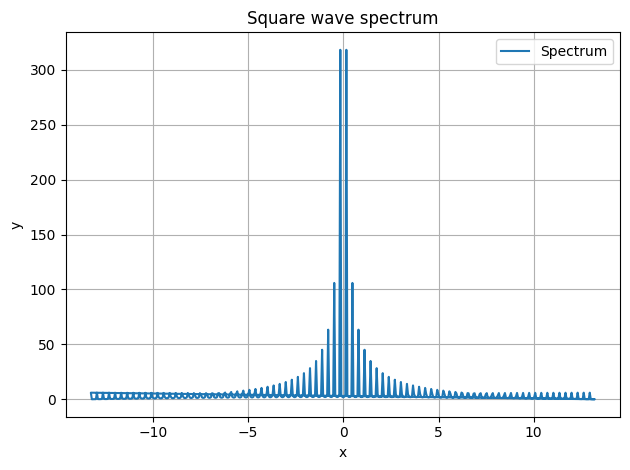

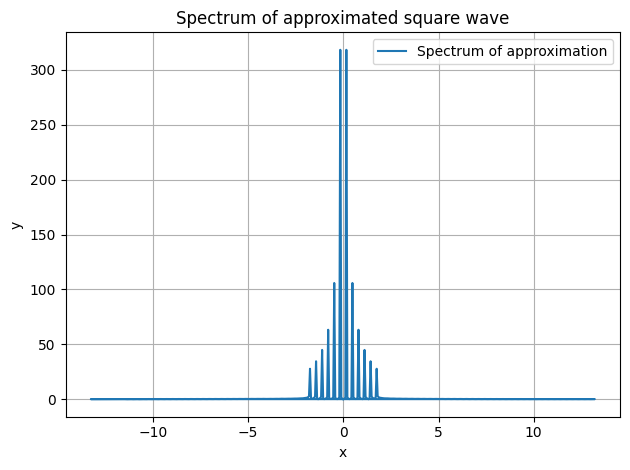

In [30]:
args = np.linspace(0, np.pi * 2 * 3, 500)
square_wave = [rect_impulse(i) for i in args]

approximation = [make_fourier_approximation(rect_impulse, i, 12, np.pi * 2, 1) for i in args]
spectrum_of_approximation = np.fft.fft(approximation)
spectrum = np.fft.fft(square_wave)

freq = np.fft.fftfreq(len(args), np.pi * 2 * 3 / 500)

show([freq], [np.abs(spectrum)], ['Spectrum'], window_title='Square wave spectrum')
show([freq], [np.abs(spectrum_of_approximation)],
                  ['Spectrum of approximation'], window_title='Spectrum of approximated square wave')

### Let's add noise and see how the spectrum changes

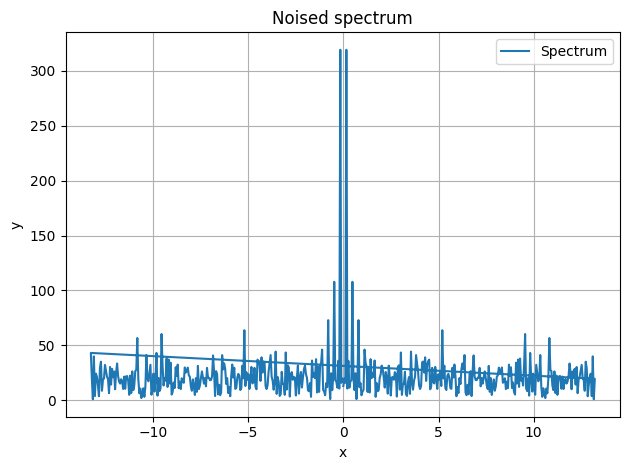

In [31]:
# Adding gaussian noise and see spectrum's changing
noise = np.random.normal(0, 1, 500)
noise_wave = noise + square_wave

spectrum = np.fft.fft(noise_wave)

show([freq], [np.abs(spectrum)], 
     ['Spectrum'], window_title='Noised spectrum')